In [1]:
import numpy as np
import matplotlib.pyplot as plt
import taew
import pandas_datareader.data as web
import yfinance as yfn
import pandas as pd

yfn.pdr_override()

# get the stock price of apple company 2 years
start_date = '2015-1-1'
end_date = '2016-1-1'

stock_data = web.get_data_yahoo('AAPL', start_date, end_date) #df= Data frame


print(type(stock_data))

stock_data = stock_data['Close']


[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>


In [2]:
stock_data = stock_data.dropna()
print(stock_data.isnull().sum())
print(stock_data)

0
Date
2015-01-02    27.332500
2015-01-05    26.562500
2015-01-06    26.565001
2015-01-07    26.937500
2015-01-08    27.972500
                ...    
2015-12-24    27.007500
2015-12-28    26.705000
2015-12-29    27.184999
2015-12-30    26.830000
2015-12-31    26.315001
Name: Close, Length: 252, dtype: float64


In [3]:
prices = np.array(stock_data.values, dtype=np.double).flatten(order='C')


# Identify the upward Elliott wave using the Alternative_ElliottWave_label_upward method
waves = taew.Alternative_ElliottWave_label_upward(prices)

8905
successfully filter out candidate wave
7636
successfully filter out candidate wave 12
1474
successfully filter out candidate wave123
2077
successfully filter out candidate wave1234
1478
successfully filter out candidate wave12345


In [4]:
waves

[{'x': [26.5625,
   32.1974983215332,
   30.897499084472656,
   33.0099983215332,
   32.56999969482422,
   33.01750183105469],
  'z': [1, 36, 48, 99, 101, 136],
  'searchIndex': 71},
 {'x': [26.5625,
   32.1974983215332,
   30.897499084472656,
   33.0099983215332,
   32.6349983215332,
   33.01750183105469],
  'z': [1, 36, 48, 99, 102, 136],
  'searchIndex': 71},
 {'x': [26.5625,
   32.1974983215332,
   30.897499084472656,
   33.0099983215332,
   32.4900016784668,
   33.01750183105469],
  'z': [1, 36, 48, 99, 103, 136],
  'searchIndex': 71},
 {'x': [26.5625,
   32.1974983215332,
   30.897499084472656,
   33.0099983215332,
   32.529998779296875,
   33.01750183105469],
  'z': [1, 36, 48, 99, 104, 136],
  'searchIndex': 71},
 {'x': [26.5625,
   32.1974983215332,
   30.897499084472656,
   33.0099983215332,
   32.220001220703125,
   33.01750183105469],
  'z': [1, 36, 48, 99, 109, 136],
  'searchIndex': 71},
 {'x': [26.5625,
   32.34000015258789,
   31.475000381469727,
   32.54750061035156,
 

In [5]:
# Extract the x and z values from the identified waves
x_values = []
z_values = []

for wave in waves:
    x_values.extend(wave['x'])
    z_values.extend(wave['z'])


In [6]:
x_values

[26.5625,
 32.1974983215332,
 30.897499084472656,
 33.0099983215332,
 32.56999969482422,
 33.01750183105469,
 26.5625,
 32.1974983215332,
 30.897499084472656,
 33.0099983215332,
 32.6349983215332,
 33.01750183105469,
 26.5625,
 32.1974983215332,
 30.897499084472656,
 33.0099983215332,
 32.4900016784668,
 33.01750183105469,
 26.5625,
 32.1974983215332,
 30.897499084472656,
 33.0099983215332,
 32.529998779296875,
 33.01750183105469,
 26.5625,
 32.1974983215332,
 30.897499084472656,
 33.0099983215332,
 32.220001220703125,
 33.01750183105469,
 26.5625,
 32.34000015258789,
 31.475000381469727,
 32.54750061035156,
 32.404998779296875,
 32.56999969482422,
 26.5625,
 32.34000015258789,
 31.475000381469727,
 32.54750061035156,
 32.404998779296875,
 32.6349983215332,
 26.5625,
 31.602500915527344,
 30.897499084472656,
 32.192501068115234,
 31.854999542236328,
 32.220001220703125,
 26.5625,
 31.602500915527344,
 30.897499084472656,
 32.6349983215332,
 31.854999542236328,
 33.01750183105469,
 26.5

In [7]:
def retracement(x_values,z_values):
    buyingPoint = []
    buyingIndex = []
    sellingPoint = []
    sellingIndex = []
    for i in range(0,int(len(x_values)/6)):
        point0 = x_values[(6*(i))] 
        point1 = x_values[(6*(i)) + 1] 
        point2 = x_values[(6*(i)) + 2]
        point3 = x_values[(6*(i)) + 3]
        point4 = x_values[(6*(i)) + 4]
        point5 = x_values[(6*(i)) + 5]

        index0 = z_values[(6*(i))] 
        index1 = z_values[(6*(i)) + 1] 
        index2 = z_values[(6*(i)) + 2]
        index3 = z_values[(6*(i)) + 3]
        index4 = z_values[(6*(i)) + 4]
        index5 = z_values[(6*(i)) + 5]
        # print(point0,point1,point2)
        # print(index0,index1,index2)
        wave1 = point1-point0
        wave2 = point1-point2 
        wave3 = point3-point2
        wave4 = point4-point3
        wave5 = point5-point4

        if wave2 <= wave1*0.618:
            buyingPoint.append(point2)
            buyingIndex.append(index2)
            
        if wave5 >= wave4*0.382:
            sellingPoint.append(point5)
            sellingIndex.append(index5)

        
        
        
    return buyingPoint,buyingIndex,sellingPoint,sellingIndex

In [8]:
# Function to randomly pick 6 points from the x_values to plot in the graph
from random import randint

def randomize_wave_plot(x_values,z_values):

    # Get the indices that are multiples of 6
    xv = []
    zv = []
    temp = randint(1,len(x_values)/6)

    for i in range(temp*6-6,temp*6):
        xv.append(x_values[i])
        zv.append(z_values[i])
    
    return xv,zv

<Figure size 1600x800 with 0 Axes>

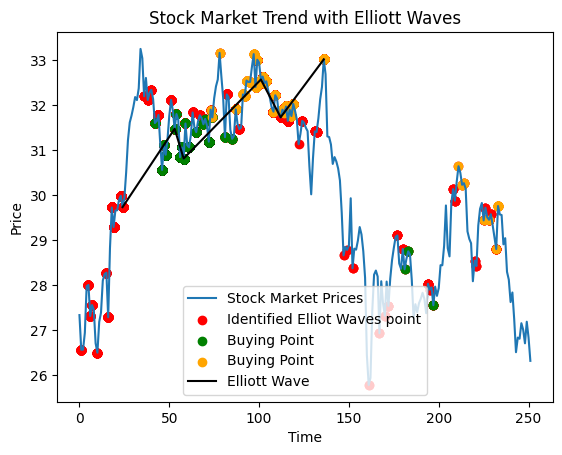

In [9]:
#randomize elliott wave plot
xv,zv = randomize_wave_plot(x_values,z_values)

buy,buy_point,sell,sell_point = retracement(x_values,z_values)

# Visualization of the elliott wave analysis
plt.figure(figsize=(16,8))
fig, ax = plt.subplots()
ax.plot(prices, label='Stock Market Prices')
ax.scatter(z_values,x_values,color='red', label='Identified Elliot Waves point')
ax.scatter(buy_point,buy,color='green', label='Buying Point')
ax.scatter(sell_point,sell,color='orange', label='Buying Point')
ax.plot(zv,xv,c='black',label="Elliott Wave")
ax.legend()

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Stock Market Trend with Elliott Waves')

plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [11]:
x_values

[26.5625,
 32.1974983215332,
 30.897499084472656,
 33.0099983215332,
 32.56999969482422,
 33.01750183105469,
 26.5625,
 32.1974983215332,
 30.897499084472656,
 33.0099983215332,
 32.6349983215332,
 33.01750183105469,
 26.5625,
 32.1974983215332,
 30.897499084472656,
 33.0099983215332,
 32.4900016784668,
 33.01750183105469,
 26.5625,
 32.1974983215332,
 30.897499084472656,
 33.0099983215332,
 32.529998779296875,
 33.01750183105469,
 26.5625,
 32.1974983215332,
 30.897499084472656,
 33.0099983215332,
 32.220001220703125,
 33.01750183105469,
 26.5625,
 32.34000015258789,
 31.475000381469727,
 32.54750061035156,
 32.404998779296875,
 32.56999969482422,
 26.5625,
 32.34000015258789,
 31.475000381469727,
 32.54750061035156,
 32.404998779296875,
 32.6349983215332,
 26.5625,
 31.602500915527344,
 30.897499084472656,
 32.192501068115234,
 31.854999542236328,
 32.220001220703125,
 26.5625,
 31.602500915527344,
 30.897499084472656,
 32.6349983215332,
 31.854999542236328,
 33.01750183105469,
 26.5

In [12]:
last_12_values = x_values[-6:]
print(last_12_values)

[27.537500381469727, 27.899999618530273, 27.552499771118164, 28.545000076293945, 28.422500610351562, 28.799999237060547]


In [13]:
del x_values[-6:]

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert the list to a pandas Series
x_values_series = pd.Series(x_values)


In [15]:
# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(x_values_series.values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaler_data)):
    x_train.append(scaler_data[x-prediction_days:x, 0])
    y_train.append(scaler_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
scaler_data

array([[0.10599384],
       [0.86928541],
       [0.69319335],
       ...,
       [0.3745344 ],
       [0.35794117],
       [0.49746018]])

In [17]:
# Build a model #
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  #Prediction of the nxt close price

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
276/276 [==============================] - 58s 120ms/step - loss: 0.0455
Epoch 2/25
276/276 [==============================] - 30s 108ms/step - loss: 0.0378
Epoch 3/25
276/276 [==============================] - 33s 119ms/step - loss: 0.0377
Epoch 4/25
276/276 [==============================] - 32s 117ms/step - loss: 0.0359
Epoch 5/25
276/276 [==============================] - 31s 113ms/step - loss: 0.0338
Epoch 6/25
276/276 [==============================] - 32s 116ms/step - loss: 0.0250
Epoch 7/25
276/276 [==============================] - 32s 116ms/step - loss: 0.0219
Epoch 8/25
276/276 [==============================] - 27s 99ms/step - loss: 0.0132
Epoch 9/25
276/276 [==============================] - 28s 101ms/step - loss: 0.0091
Epoch 10/25
276/276 [==============================] - 29s 103ms/step - loss: 0.0069
Epoch 11/25
276/276 [==============================] - 29s 105ms/step - loss: 0.0055
Epoch 12/25
276/276 [==============================] - 27s 97ms/step - loss

In [18]:
last_12_values = pd.Series(last_12_values)

In [19]:
# Test the model accuracy on existing data #
# load test data

actual_prices = last_12_values.values

total_dataset = pd.concat((x_values_series, last_12_values), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(last_12_values) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [20]:
last_12_values

0    27.537500
1    27.900000
2    27.552500
3    28.545000
4    28.422501
5    28.799999
dtype: float64

In [21]:
model_inputs

array([[0.15577378],
       [0.3047749 ],
       [0.24009477],
       [0.49746018],
       [0.40907544],
       [0.53877416],
       [0.15577378],
       [0.3047749 ],
       [0.24009477],
       [0.51405367],
       [0.40907544],
       [0.53877416],
       [0.20826264],
       [0.3047749 ],
       [0.24009477],
       [0.49542843],
       [0.40907544],
       [0.53877416],
       [0.20826264],
       [0.3047749 ],
       [0.24009477],
       [0.49746018],
       [0.40907544],
       [0.53877416],
       [0.20826264],
       [0.3047749 ],
       [0.24009477],
       [0.51405367],
       [0.40907544],
       [0.53877416],
       [0.23806302],
       [0.3047749 ],
       [0.24009477],
       [0.49542843],
       [0.40907544],
       [0.53877416],
       [0.23806302],
       [0.3047749 ],
       [0.24009477],
       [0.49746018],
       [0.40907544],
       [0.53877416],
       [0.23806302],
       [0.3047749 ],
       [0.24009477],
       [0.51405367],
       [0.40907544],
       [0.538

In [22]:
# Make Predictions on test data #
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

1/1 [==============================] - 5s 5s/step


In [23]:
prediction_prices

array([[27.986526],
       [27.420261],
       [28.031239],
       [28.673073],
       [29.13012 ],
       [29.185154]], dtype=float32)

In [24]:
last_12_values

0    27.537500
1    27.900000
2    27.552500
3    28.545000
4    28.422501
5    28.799999
dtype: float64

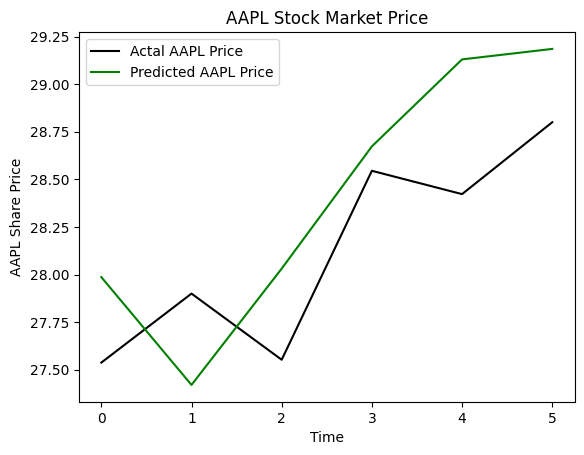

In [25]:
# plot the test predictions #
plt.plot(actual_prices, color="black", label=f"Actal AAPL Price")
plt.plot(prediction_prices, color="green", label=f"Predicted AAPL Price")
plt.title("AAPL Stock Market Price")
plt.xlabel("Time")
plt.ylabel("AAPL Share Price")
plt.legend()
plt.show()

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_prices, prediction_prices))

# Calculate MAE
mae = mean_absolute_error(actual_prices, prediction_prices)

# Calculate MAPE
mape = (mae / np.mean(actual_prices)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 0.4701834882139793
MAE: 0.43805821736653644
MAPE: 1.5574711102927237


In [27]:
# predict the next day #
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

print(scaler.inverse_transform(real_data[-1]))
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"nxt prediction : {prediction}")

[[28.03000069]
 [27.55249977]
 [29.57500076]
 [28.79999924]
 [29.75749969]
 [27.31749916]
 [28.03000069]
 [27.55249977]
 [29.4375    ]
 [28.79999924]
 [29.75749969]
 [27.31749916]
 [28.03000069]
 [27.55249977]
 [29.45249939]
 [28.79999924]
 [29.75749969]
 [27.31749916]
 [28.03000069]
 [27.55249977]
 [29.57500076]
 [28.79999924]
 [29.75749969]
 [27.53750038]
 [28.03000069]
 [27.55249977]
 [29.4375    ]
 [28.79999924]
 [29.75749969]
 [27.53750038]
 [28.03000069]
 [27.55249977]
 [29.45249939]
 [28.79999924]
 [29.75749969]
 [27.53750038]
 [28.03000069]
 [27.55249977]
 [29.57500076]
 [28.79999924]
 [29.75749969]
 [27.53750038]
 [27.89999962]
 [27.55249977]
 [28.54500008]
 [28.42250061]
 [29.4375    ]
 [27.53750038]
 [27.89999962]
 [27.55249977]
 [28.54500008]
 [28.42250061]
 [29.45249939]
 [27.53750038]
 [27.89999962]
 [27.55249977]
 [28.54500008]
 [28.42250061]
 [28.79999924]]
1/1 [==============================] - 5s 5s/step
nxt prediction : [[28.131622]]
